In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') 
!./configure --prefix=/usr
!make
!make install

os.chdir('../')
!pip install TA-Lib

--2021-11-27 10:28:32--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-11-27 10:28:32--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-11-27 10:28:32--  http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netactuat

In [ ]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math

   
import os
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump


import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.layers import GRU, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, ELU, ReLU
from tensorflow.keras import Sequential, regularizers
from tensorflow.python.client import device_lib

### Importing all the required library ###
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import math
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from numpy import array
from tensorflow.keras.models import Sequential,save_model,load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense ,LeakyReLU
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv1D, Conv2D ,Conv3D ,Conv2DTranspose,Conv1DTranspose
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

# import talib as ta
import csv
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error 
import talib as ta

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


id = '1vhAqz8lvWfxH0dcy5QTpKm5qawb6SW5K'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_USD_M30.csv') 
 
id = '13_lAB-ioAmtmWabgm5hHBXYY5ssw2QKs'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_USD_M15.csv')
 
id = '1TPA4Mtbjws9yTJdpV1kK5fDA0Vxk_2eo'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_USD_H1.csv')



In [ ]:
#Downloading files
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1gkkROejTwIG8SD4kufx75MPYRcmp4ydr',dest_path='./model.zip',unzip=True)

# Dataset fill

## 15M

In [ ]:
dataset_M15 = pd.read_csv('AUD_USD_M15.csv', parse_dates=[0], index_col=0)
dataset_M15.index

DatetimeIndex(['2005-01-02 18:45:00+00:00', '2005-01-02 19:15:00+00:00',
               '2005-01-02 19:45:00+00:00', '2005-01-02 20:00:00+00:00',
               '2005-01-02 20:15:00+00:00', '2005-01-02 20:30:00+00:00',
               '2005-01-02 20:45:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 21:15:00+00:00', '2005-01-02 21:30:00+00:00',
               ...
               '2021-07-30 18:30:00+00:00', '2021-07-30 18:45:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 19:15:00+00:00',
               '2021-07-30 19:30:00+00:00', '2021-07-30 19:45:00+00:00',
               '2021-07-30 20:00:00+00:00', '2021-07-30 20:15:00+00:00',
               '2021-07-30 20:30:00+00:00', '2021-07-30 20:45:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=417944, freq=None)

In [ ]:
t_index_M15 = pd.date_range('2005-01-02 18:45:00+00:00',  '2021-07-30 20:45:00+00:00', freq='15T')  
dataset_M15 = dataset_M15.reindex(t_index_M15)

In [ ]:
dataset_M15 = dataset_M15.reset_index(level=0)
dataset_M15 = dataset_M15.rename(columns={'index':'datetime'})

In [ ]:
ful_data0_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 0]  
ful_data1_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 1]
ful_data2_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 2]
ful_data3_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 3]
ful_data4_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 4]
ful_data4_M15 = ful_data4_M15[ful_data4_M15['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 6]
ful_data6_M15 = ful_data6_M15[ful_data6_M15['datetime'].dt.hour.isin(np.arange(21, 24))]

In [ ]:
ful_data_M15 = pd.concat([ful_data0_M15, ful_data1_M15, ful_data2_M15, ful_data3_M15, ful_data4_M15, ful_data6_M15])
ful_data_M15 = ful_data_M15.sort_values(by = 'datetime')

In [ ]:
ful_data_M15 = ful_data_M15.reset_index()
ful_data_M15 = ful_data_M15.drop(labels='index',axis=1)

In [ ]:
ful_data_M15 = ful_data_M15.pad()  
ful_data_M15

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.78110,0.78150,0.78110,0.78140
1,2005-01-02 21:15:00+00:00,0.78110,0.78110,0.78070,0.78090
2,2005-01-02 21:30:00+00:00,0.78080,0.78100,0.78070,0.78100
3,2005-01-02 21:45:00+00:00,0.78090,0.78090,0.78060,0.78060
4,2005-01-02 22:00:00+00:00,0.78070,0.78100,0.78070,0.78090
...,...,...,...,...,...
418651,2021-07-30 19:45:00+00:00,0.73381,0.73402,0.73331,0.73378
418652,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73402
418653,2021-07-30 20:15:00+00:00,0.73398,0.73404,0.73384,0.73398
418654,2021-07-30 20:30:00+00:00,0.73394,0.73462,0.73387,0.73462


In [ ]:
np.any(ful_data_M15.isnull())

False

## 30M

In [ ]:
dataset_M30 = pd.read_csv('AUD_USD_M30.csv', parse_dates=[0], index_col=0)
dataset_M30.index

DatetimeIndex(['2005-01-02 18:30:00+00:00', '2005-01-02 19:00:00+00:00',
               '2005-01-02 19:30:00+00:00', '2005-01-02 20:00:00+00:00',
               '2005-01-02 20:30:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 21:30:00+00:00', '2005-01-02 22:00:00+00:00',
               '2005-01-02 22:30:00+00:00', '2005-01-02 23:00:00+00:00',
               ...
               '2021-07-30 16:00:00+00:00', '2021-07-30 16:30:00+00:00',
               '2021-07-30 17:00:00+00:00', '2021-07-30 17:30:00+00:00',
               '2021-07-30 18:00:00+00:00', '2021-07-30 18:30:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 19:30:00+00:00',
               '2021-07-30 20:00:00+00:00', '2021-07-30 20:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=209850, freq=None)

In [ ]:
t_index_M30 = pd.date_range('2005-01-02 18:30:00+00:00',  '2021-07-30 20:30:00+00:00', freq='30T')
dataset_M30 = dataset_M30.reindex(t_index_M30)

In [ ]:
dataset_M30 = dataset_M30.reset_index(level=0)
dataset_M30 = dataset_M30.rename(columns={'index':'datetime'})

In [ ]:
ful_data0_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 0]  
ful_data1_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 1]
ful_data2_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 2]
ful_data3_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 3]
ful_data4_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 4]
ful_data4_M30 = ful_data4_M30[ful_data4_M30['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 6]
ful_data6_M30 = ful_data6_M30[ful_data6_M30['datetime'].dt.hour.isin(np.arange(21, 24))]

In [ ]:
ful_data_M30 = pd.concat([ful_data0_M30, ful_data1_M30, ful_data2_M30, ful_data3_M30, ful_data4_M30, ful_data6_M30])
ful_data_M30 = ful_data_M30.sort_values(by = 'datetime')

In [ ]:
ful_data_M30 = ful_data_M30.reset_index()
ful_data_M30 = ful_data_M30.drop(labels='index',axis=1)

In [ ]:
ful_data_M30 = ful_data_M30.pad()
ful_data_M30

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.78110,0.78150,0.78070,0.78090
1,2005-01-02 21:30:00+00:00,0.78080,0.78100,0.78060,0.78060
2,2005-01-02 22:00:00+00:00,0.78070,0.78130,0.78070,0.78130
3,2005-01-02 22:30:00+00:00,0.78160,0.78240,0.78140,0.78240
4,2005-01-02 23:00:00+00:00,0.78250,0.78390,0.78220,0.78370
...,...,...,...,...,...
209323,2021-07-30 18:30:00+00:00,0.73328,0.73363,0.73310,0.73348
209324,2021-07-30 19:00:00+00:00,0.73352,0.73390,0.73352,0.73386
209325,2021-07-30 19:30:00+00:00,0.73383,0.73402,0.73331,0.73378
209326,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73398


## 1H

In [ ]:
dataset_H1 = pd.read_csv('AUD_USD_H1.csv', parse_dates=[0], index_col=0)
dataset_H1.index

DatetimeIndex(['2005-01-02 18:00:00+00:00', '2005-01-02 19:00:00+00:00',
               '2005-01-02 20:00:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 22:00:00+00:00', '2005-01-02 23:00:00+00:00',
               '2005-01-03 00:00:00+00:00', '2005-01-03 01:00:00+00:00',
               '2005-01-03 02:00:00+00:00', '2005-01-03 03:00:00+00:00',
               ...
               '2021-07-30 11:00:00+00:00', '2021-07-30 12:00:00+00:00',
               '2021-07-30 13:00:00+00:00', '2021-07-30 14:00:00+00:00',
               '2021-07-30 15:00:00+00:00', '2021-07-30 16:00:00+00:00',
               '2021-07-30 17:00:00+00:00', '2021-07-30 18:00:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 20:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=105627, freq=None)

In [ ]:
t_index_H1 = pd.date_range('2005-01-02 18:00:00+00:00',  '2021-07-30 20:00:00+00:00', freq='1H')
dataset_H1 = dataset_H1.reindex(t_index_H1)

In [ ]:
dataset_H1 = dataset_H1.reset_index(level=0)
dataset_H1 = dataset_H1.rename(columns={'index':'datetime'})

In [ ]:
ful_data0_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 0]  
ful_data1_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 1]
ful_data2_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 2]
ful_data3_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 3]
ful_data4_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 4]
ful_data4_H1 = ful_data4_H1[ful_data4_H1['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 6]
ful_data6_H1 = ful_data6_H1[ful_data6_H1['datetime'].dt.hour.isin(np.arange(21, 24))]

In [ ]:
ful_data_H1 = pd.concat([ful_data0_H1, ful_data1_H1, ful_data2_H1, ful_data3_H1, ful_data4_H1, ful_data6_H1])
ful_data_H1 = ful_data_H1.sort_values(by = 'datetime')

In [ ]:
ful_data_H1 = ful_data_H1.reset_index()
ful_data_H1 = ful_data_H1.drop(labels='index',axis=1)

In [ ]:
ful_data_H1 = ful_data_H1.pad()
ful_data_H1

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.78110,0.78150,0.78060,0.78060
1,2005-01-02 22:00:00+00:00,0.78070,0.78240,0.78070,0.78240
2,2005-01-02 23:00:00+00:00,0.78250,0.78390,0.78220,0.78320
3,2005-01-03 00:00:00+00:00,0.78330,0.78350,0.78130,0.78180
4,2005-01-03 01:00:00+00:00,0.78180,0.78275,0.78145,0.78155
...,...,...,...,...,...
104659,2021-07-30 16:00:00+00:00,0.73506,0.73510,0.73425,0.73434
104660,2021-07-30 17:00:00+00:00,0.73437,0.73440,0.73361,0.73394
104661,2021-07-30 18:00:00+00:00,0.73391,0.73402,0.73310,0.73348
104662,2021-07-30 19:00:00+00:00,0.73352,0.73402,0.73331,0.73378


# Data Preprocessing

## 1 Hour

In [ ]:
def data_preprocessing_1H(data):
  def get_technical_indicators(data, timeperiod = 10):
    data['wma']=ta.WMA(data.close_1h,timeperiod=timeperiod)
    data['ema']=ta.EMA(data.close_1h,timeperiod=timeperiod)
    data['midpoint']=ta.MIDPOINT(data.close_1h,timeperiod=timeperiod)
    data['sma']=ta.SMA(data.close_1h,timeperiod=timeperiod)
    data['tema']=ta.TEMA(data.close_1h,timeperiod=timeperiod)
    data['ma']=ta.MA(data.close_1h,timeperiod=timeperiod)
    data['kama']=ta.KAMA(data.close_1h,timeperiod=timeperiod)
    data['rocr']=ta.ROCR(data.close_1h,timeperiod=timeperiod)
    data['DEMA']=ta.DEMA(data.close_1h,timeperiod=timeperiod)
    data['TRIMA']=ta.TRIMA(data.close_1h,timeperiod=timeperiod)
    data['LINEARREG']=ta.LINEARREG(data.close_1h,timeperiod=timeperiod)
    data['TSF']=ta.TSF(data.close_1h,timeperiod=timeperiod)
    return data
  
  # def y_size_scale(column, num_point = 17, pred_point = 4):
    
  #   X, Y = [], []
  #   for i in range(num_point ,len(column)-pred_point+1):
            
  #       y_holder = []
  #       for j in range(i,i + pred_point):
  #           y_holder.append(column[j])
  #       Y.append(y_holder)

  #       x_holder = []
  #       for k in range(i-num_point,i):
  #           x_holder.append(column[k])
  #       X.append(x_holder)
    
  #   return array(X), array(Y)

  def feature_scale(column, num_point = 17, pred_point = 4):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)+1):
        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    return array(X)


  
  num_point = 17
  pred_point = 4
  data = get_technical_indicators(data)
  data = data.iloc[30:,:].reset_index(drop=True)
  data_H1_ali = data
  # for i in range(3):
  #   data_H1_ali = data_H1_ali.append(data)
  # data_H1_ali = data_H1_ali.sort_values(by = 'datetime')
  # data_H1_ali = data_H1_ali.reset_index()
  # data_H1_ali = data_H1_ali.drop(labels='index',axis=1)

  fake_y = feature_scale(data_H1_ali['close_1h'])

  H1_max_y_rows = fake_y.max(axis=1) 
  # real_scaled_unshape = real_y/H1_max_y_rows[:, np.newaxis]

  
  feature_columns = [column for column in data_H1_ali]
  feature_tem = np.zeros((H1_max_y_rows.shape[0], data_H1_ali.shape[1], num_point))

  for i in range(data_H1_ali.shape[1]):
    feature_fake = feature_scale(data_H1_ali[feature_columns[i]], num_point, pred_point)
    max_feature_rows = feature_fake.max(axis=1)
    fake_scaled_unshape = feature_fake / max_feature_rows[:, np.newaxis]
    feature_tem[:,i,:] = fake_scaled_unshape

  np.savez('AUD_USD_H1', AUD_USD_H1_feature = feature_tem, AUD_USD_H1_y = H1_max_y_rows)

  return feature_tem, H1_max_y_rows

## 30M

In [ ]:
def data_preprocessing_30M(data):
  def get_technical_indicators(data, timeperiod = 10):
    data['wma']=ta.WMA(data.close_30m,timeperiod=timeperiod)
    data['ema']=ta.EMA(data.close_30m,timeperiod=timeperiod)
    data['midpoint']=ta.MIDPOINT(data.close_30m,timeperiod=timeperiod)
    data['sma']=ta.SMA(data.close_30m,timeperiod=timeperiod)
    data['tema']=ta.TEMA(data.close_30m,timeperiod=timeperiod)
    data['ma']=ta.MA(data.close_30m,timeperiod=timeperiod)
    data['kama']=ta.KAMA(data.close_30m,timeperiod=timeperiod)
    data['rocr']=ta.ROCR(data.close_30m,timeperiod=timeperiod)
    data['DEMA']=ta.DEMA(data.close_30m,timeperiod=timeperiod)
    data['TRIMA']=ta.TRIMA(data.close_30m,timeperiod=timeperiod)
    data['LINEARREG']=ta.LINEARREG(data.close_30m,timeperiod=timeperiod)
    data['TSF']=ta.TSF(data.close_30m,timeperiod=timeperiod)
    return data
  
  # def y_size_scale(column, num_point = 17, pred_point = 4):
    
  #   X, Y = [], []
  #   for i in range(num_point ,len(column)-pred_point+1):
            
  #       y_holder = []
  #       for j in range(i,i + pred_point):
  #           y_holder.append(column[j])
  #       Y.append(y_holder)

  #       x_holder = []
  #       for k in range(i-num_point,i):
  #           x_holder.append(column[k])
  #       X.append(x_holder)
    
  #   return array(X), array(Y)

  def feature_scale(column, num_point = 17, pred_point = 4):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)+1):
        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    return array(X)

  
  num_point = 17
  pred_point = 4
  data = get_technical_indicators(data)
  data = data.iloc[30:,:].reset_index(drop=True)
  data_30M_ali = data
  # for i in range(1):
  #   data_30M_ali = data_30M_ali.append(data)
  # data_30M_ali = data_30M_ali.sort_values(by = 'datetime')
  # data_30M_ali = data_30M_ali.reset_index()
  # data_30M_ali = data_30M_ali.drop(labels='index',axis=1)

  fake_y = feature_scale(data_30M_ali['close_30m'])

  M30_max_y_rows = fake_y.max(axis=1) 

  # real_scaled_unshape = real_y/M30_max_y_rows[:, np.newaxis]

  
  feature_columns = [column for column in data_30M_ali]
  feature_tem = np.zeros((M30_max_y_rows.shape[0], data_30M_ali.shape[1], num_point))

  for i in range(data_30M_ali.shape[1]):
    feature_fake = feature_scale(data_30M_ali[feature_columns[i]])
    max_feature_rows = feature_fake.max(axis=1)
    fake_scaled_unshape = feature_fake / max_feature_rows[:, np.newaxis]
    feature_tem[:,i,:] = fake_scaled_unshape

  np.savez('AUD_USD_30M', AUD_USD_30M_feature = feature_tem, AUD_USD_30M_y = M30_max_y_rows)

  return feature_tem, M30_max_y_rows

## 15 M

In [ ]:
def data_preprocessing_15M(data):
  def get_technical_indicators(data, timeperiod = 10):
    data['wma']=ta.WMA(data.close_15m,timeperiod=timeperiod)
    data['ema']=ta.EMA(data.close_15m,timeperiod=timeperiod)
    data['midpoint']=ta.MIDPOINT(data.close_15m,timeperiod=timeperiod)
    data['sma']=ta.SMA(data.close_15m,timeperiod=timeperiod)
    data['tema']=ta.TEMA(data.close_15m,timeperiod=timeperiod)
    data['ma']=ta.MA(data.close_15m,timeperiod=timeperiod)
    data['kama']=ta.KAMA(data.close_15m,timeperiod=timeperiod)
    data['rocr']=ta.ROCR(data.close_15m,timeperiod=timeperiod)
    data['DEMA']=ta.DEMA(data.close_15m,timeperiod=timeperiod)
    data['TRIMA']=ta.TRIMA(data.close_15m,timeperiod=timeperiod)
    data['LINEARREG']=ta.LINEARREG(data.close_15m,timeperiod=timeperiod)
    data['TSF']=ta.TSF(data.close_15m,timeperiod=timeperiod)
    return data
  
  # def y_size_scale(column, num_point = 17, pred_point = 4):
    
  #   X, Y = [], []
  #   for i in range(num_point ,len(column)-pred_point+1):
            
  #       y_holder = []
  #       for j in range(i,i + pred_point):
  #           y_holder.append(column[j])
  #       Y.append(y_holder)

  #       x_holder = []
  #       for k in range(i-num_point,i):
  #           x_holder.append(column[k])
  #       X.append(x_holder)
    
  #   return array(X), array(Y)

  def feature_scale(column, num_point = 17, pred_point = 4):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)+1):
        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    return array(X)

  num_point = 17
  pred_point = 4
  data = get_technical_indicators(data)
  data = data.iloc[30:,:].reset_index(drop=True)
  data_15M_ali = data


  fake_y = feature_scale(data_15M_ali['close_15m'])

  M15_max_y_rows = fake_y.max(axis=1) 
  # real_scaled_unshape = real_y/M15_max_y_rows[:, np.newaxis]

  
  feature_columns = [column for column in data_15M_ali]
  feature_tem = np.zeros((M15_max_y_rows.shape[0], data_15M_ali.shape[1], num_point))

  for i in range(data_15M_ali.shape[1]):
    feature_fake = feature_scale(data_15M_ali[feature_columns[i]])
    max_feature_rows = feature_fake.max(axis=1)
    fake_scaled_unshape = feature_fake / max_feature_rows[:, np.newaxis]
    feature_tem[:,i,:] = fake_scaled_unshape

  np.savez('AUD_USD_15M', AUD_USD_15M_feature = feature_tem, AUD_USD_15M_y = M15_max_y_rows)

  return feature_tem, M15_max_y_rows

# Backtesting

In [ ]:
class signalHandler:

    def __init__(self,stop_loss,take_profit,broker_cost,data):
        self.original_stop_loss = stop_loss
        self.original_take_profit = take_profit
        self.broker_cost = broker_cost
        self.stop_loss = stop_loss
        self.take_profit = take_profit

        self.prev_traded_position = 0
        self.prev_traded_price = None

        self.total_profit = 0
        data['action'] = ''
        data['P/L'] = ''
        data['Total profit'] = ''
        n = len(data)
        self.action = [""]*n
        self.arr_PL = [""]*n 
        self.arr_total_profit = [""]*n 
        self.current_action = ""
        self.data = data        

    ############### Helpers ###############

    # Floors or ceils PL 
    def bandPL(self,PL):
        if PL > self.take_profit:
            PL = self.take_profit
        elif PL < self.stop_loss:
            PL = self.stop_loss
        return PL

    # Only called when a trade happens
    def closeTrade(self,PL):
        # Reseting Current position,action AND toal profit
        if self.prev_traded_position == -1:
            self.current_action = "short_buy"
        elif self.prev_traded_position == 1:
            self.current_action = "sell"        
        
        self.total_profit += PL

        self.prev_traded_position = 0
        self.prev_traded_price = None

        self.stop_loss = self.original_stop_loss
        self.take_profit = self.original_take_profit
        
    # Called every iteration to ADD stats into an array.
    # These arrays will be later copied into a DATAFRAME
    def saveStats(self,PL,index):
                
        if self.prev_traded_position == 1:
            self.action[index] = self.current_action
        
        elif self.prev_traded_position == -1:
            self.action[index] = self.current_action
        
        elif self.prev_traded_position == 0:
            self.action[index] = self.current_action
        
        self.arr_PL[index] = PL
        self.arr_total_profit[index] = self.total_profit

    # Transfers all the data into the DATAFRAME
    # The constructor is initialised with
    def getData(self):
        self.data['action'] = self.action
        self.data['P/L'] = self.arr_PL
        self.data['Total profit'] = self.arr_total_profit
        return self.data

    ############### Actions ###############
    def buy(self,current_price,index):
        
        PL = 0 # <----- Default for if currently holding 
        if self.prev_traded_position == 0:
            self.current_action = "buy"
            self.prev_traded_position = 1
            self.prev_traded_price = current_price
            self.saveStats(PL,index)

        elif self.prev_traded_position == 1:
            # Reciving a stroger buy signal, 
            # Changing take profit to reflect that
            # PL = self.prev_traded_position*(current_price - self.prev_traded_price)
            # if PL > 0:
            #     self.take_profit *= 1.02 # <----- EDIT Based on how you wish to scale take_profit
            #     self.stop_loss *= 2
            self.checkStopConditions(current_price,index)

        elif self.prev_traded_position == -1:
            self.current_action = "short_buy"
            PL = (self.prev_traded_position*(current_price - self.prev_traded_price))-self.broker_cost
            PL = self.bandPL(PL)
            self.closeTrade(PL)
            self.saveStats(PL,index)

        else: 
            print("Should not be here")
            
        return self.total_profit

    def sell(self,current_price,index):
        
        PL = 0 # <----- Default for if currently holding
        if self.prev_traded_position == 0:
            self.current_action = "short"
            self.prev_traded_position = -1
            self.prev_traded_price = current_price
            self.saveStats(PL,index)

        elif self.prev_traded_position == -1:
            # Reciving a stroger sell signal, 
            # Changing stop loss to reflect that
            # self.stop_loss *= 0.5 # <----- EDIT Based on how you wish to scale stop_loss
            self.checkStopConditions(current_price,index)
        
        elif self.prev_traded_position == 1:
            self.current_action = "sell"
            PL = (self.prev_traded_position*(current_price - self.prev_traded_price))-self.broker_cost
            PL = self.bandPL(PL)
            self.closeTrade(PL)
            self.saveStats(PL,index)
        else: 
            print("Should not be here")

        return self.total_profit
    
    # Called from MAIN code when the HOLD signal is received
    # ALSO called by the BUY AND SELL functions when
    # the broker sequentially receives the same signal.
    def checkStopConditions(self,current_price,index):
        PL = 0
        self.current_action = "hold"
        
        if self.prev_traded_position != 0:
            
            PL = (self.prev_traded_position*(current_price - self.prev_traded_price))-self.broker_cost
            
            if PL > self.take_profit:
                PL = self.bandPL(PL) 
                self.closeTrade(PL)
            elif PL < self.stop_loss:
                PL = self.bandPL(PL)
                self.closeTrade(PL)
        
        self.saveStats(PL,index)
        return self.total_profit

In [ ]:
import matplotlib.pyplot as plt

class visualise:

    def __init__(self,data):
        self.data = data

        # Chart look and feel
        self.line_color = 'blue'
        self.buy_marker = '^'
        self.sell_marker = 'v'
        self.hold_marker = 'None'
        self.buy_marker_color = 'green'
        self.sell_marker_color = 'red'
        self.hold_marker_color = 'grey'
        self.marker_size = 9
        
        
        
        arr_action = []
        arr_action.extend(data['action'])
        self.arr_open = []
        self.arr_open.extend(data['open_15m'])
        self.arr_buy =[]
        self.arr_sell = []
        self.arr_hold = []
        for i in range(len(self.arr_open)):
            if arr_action[i] == "buy" or arr_action[i] == "short_buy":
                self.arr_buy.append((i, self.arr_open[i]))
            elif arr_action[i] == "sell" or arr_action[i] == "short":
                
                self.arr_sell.append((i, self.arr_open[i]))
            elif arr_action[i] == "hold":
                self.arr_hold.append((i, self.arr_open[i]))
            #else:
            #    print("Unrecognised Action!!")

    def plotFig(self):
        plt.plot(self.arr_open,color=self.line_color,marker='None')
        x,y = zip(*self.arr_buy)
        plt.plot(x, y,markerfacecolor=self.buy_marker_color, linestyle='None',marker=self.buy_marker, markersize=self.marker_size,markeredgecolor=self.buy_marker_color)
        x,y = zip(*self.arr_sell)
        plt.plot(x, y, markerfacecolor=self.sell_marker_color,linestyle='None', marker=self.sell_marker, markersize=self.marker_size,markeredgecolor=self.sell_marker_color)
        x,y = zip(*self.arr_hold)
        plt.plot(x, y, markerfacecolor=self.hold_marker_color,linestyle='None', marker=self.hold_marker, markersize=self.marker_size,markeredgecolor=self.hold_marker_color)
        plt.show()


In [ ]:
def trading_strategy(inputs):

	df = pd.DataFrame(inputs)

	input_15M = df.iloc[:,1:5]
	input_30M = df.iloc[:,5:9]
	input_1H = df.iloc[:,9:13]

	feature_tem_15M, M15_max_y_rows = data_preprocessing_15M(input_15M)
	feature_tem_30M, M30_max_y_rows = data_preprocessing_30M(input_30M)
	feature_tem_1H, H1_max_y_rows = data_preprocessing_1H(input_1H)
 
	model = load_model(r'/content/model')

	predict_price = model.predict({"X_H1": feature_tem_1H, "X_M30": feature_tem_30M, "X_M15": feature_tem_15M})
	
	inver_price = predict_price * M15_max_y_rows[:, np.newaxis]
	# print(inver_price)


	# if (inver_price[0,1] - input_15M['close_15m'].iloc[-1] > 0.0003) and (inver_price[0,0] > input_15M['close_15m'].iloc[-1]):
	# 	return 1  # buy
	# elif (inver_price[0,1] - input_15M['close_15m'].iloc[-1] < 0.0003) and (inver_price[0,0] < input_15M['close_15m'].iloc[-1]):
	# 	return -1 # sell 
	if (inver_price[0,3] > inver_price[0,0]) and (inver_price[0,0] > input_15M['close_15m'].iloc[-1]):
		return 1  # buy
	elif (inver_price[0,3] < inver_price[0,0]) and (inver_price[0,0] < input_15M['close_15m'].iloc[-1]):
		return -1 # sell 
	else:
		return 0 # do nothing


In [ ]:
data1 = ful_data_H1
data2 = ful_data_M30
data3 = ful_data_M15

for i in range(3):
  data1 = data1.append(ful_data_H1)
  data1 = data1.sort_values(by = 'datetime')
  data1 = data1.reset_index()
  data1 = data1.drop(labels='index',axis=1)

for i in range(1):
  data2 = data2.append(ful_data_M30)
  data2 = data2.sort_values(by = 'datetime')
  data2 = data2.reset_index()
  data2 = data2.drop(labels='index',axis=1)


whole_data = pd.concat([data3, data2.iloc[:,1:], data1.iloc[:,1:]], axis = 1)
col = ['datetime','open_15m','high_15m','low_15m','close_15m',
                                'open_30m','high_30m','low_30m','close_30m','open_1h','high_1h','low_1h','close_1h']
whole_data.columns = col

## main

Time consumed: 198.25s


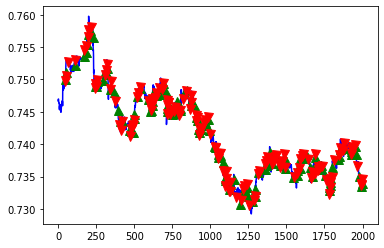

In [ ]:
import os

import pandas as pd
pd.options.mode.chained_assignment = None
import time
from collections import deque

############# READ FILE #############

#data = pd.read_csv('GBPUSD_H1_202001020600_202006010000.csv',sep='\t', skiprows=1, names = ['date', 'time', 'open', 'high', 'low', 'close', 'tickvol','vol','spread' ])
#data = pd.read_csv('EURUSD_M30.csv',sep=',', skiprows=1, names = ['time', 'open', 'high', 'low', 'close', 'tickvol','vol','spread' ])
#data = pd.read_csv('EURUSD_M30.csv',sep='\t', skiprows=1, names = ['date', 'time', 'open', 'high', 'low', 'close', 'tickvol','vol','spread' ])
#data = data.drop(['tickvol', 'vol','spread'], axis=1)  # we do not need these coloumns
# data = pd.read_csv('AUD_USD_H1.csv')
# data = pd.read_csv('AUD_USD_M30.csv')
# data = pd.read_csv('AUD_USD_M15.csv')

data = whole_data.tail(2000)

# model = load_model('model')

############# Hyperparameters #############
input_row_size = 47         # <----- Minimum number of inputs required by YOUR trading strategy
one_pip = 0.0001            # <----- Indicating the value of 1 pip, i.e. usually 0.0001 for all major fx except for JPY pairs (0.01)
stop_loss = -5*one_pip     # <----- (THIS WILL CHANGE!!, if the code recieves opposite signal than previously executed order then the position will be closed. 
take_profit = 20*one_pip    # <----- For example. If we holding a buy pisition and sell signal received (labeled as buyy_sell in signalHandler.py) then the position will be closed. 
broker_cost = 2*one_pip
inputs = deque(maxlen=input_row_size)
############# BACKTESTING #############
# Handels Buy and Sell
broker = signalHandler(stop_loss,take_profit,broker_cost,data)

start_time = time.time() 
index = 0
signal = 0
for _,row in data.iterrows():

    # Loading the inputs array till the 
    # minimum number of inputs are reached
    inputs.append(row)
    
    if len(inputs) == input_row_size:
        signal = trading_strategy(list(inputs)) #  call trading strategy. It will return one of the following 1 (Buy), 0 (do nothing) or -1 (sell)

        # Current Price
        current_price = row['close_15m']  
        
        # Checks signal and executes
        if signal == 1:
            broker.buy(current_price,index)
        elif signal == -1:
            broker.sell(current_price,index)
        elif signal == 0:
            # Checking if stop loss or take profit is hit
            broker.checkStopConditions(current_price,index)
        else:
            print("Unknown Signal")
            break
     
    index += 1

end_time = time.time()
print("Time consumed: {}s".format(round(end_time-start_time,2)))

final_data = broker.getData() # <----- Gets Data into a DATAFRAME
final_data.to_csv('backtesting.csv')
# final_data has THREE new coloumns
#   'action'        : The action the code implemented at that timestep.
#   'P/L'           : The profit or loss at the time step, 0 when holding.
#   'Total profit'  : The total profit TILL that time step. 

############# VISUALISEING #############
visualiser = visualise(final_data)
visualiser.plotFig()